In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
%matplotlib inline

In [73]:
x=np.arange(0,1000,0.1)
y=np.sin(x*np.pi)<0

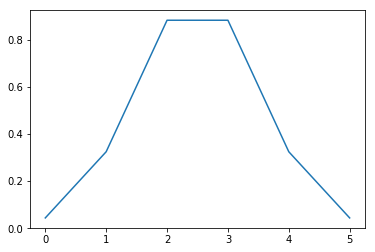

In [74]:
k=np.ones(5)
win = signal.gaussian(6,1.0)
#filtered = signal.convolve(y, win, mode='same') / sum(win)
plt.plot(win)

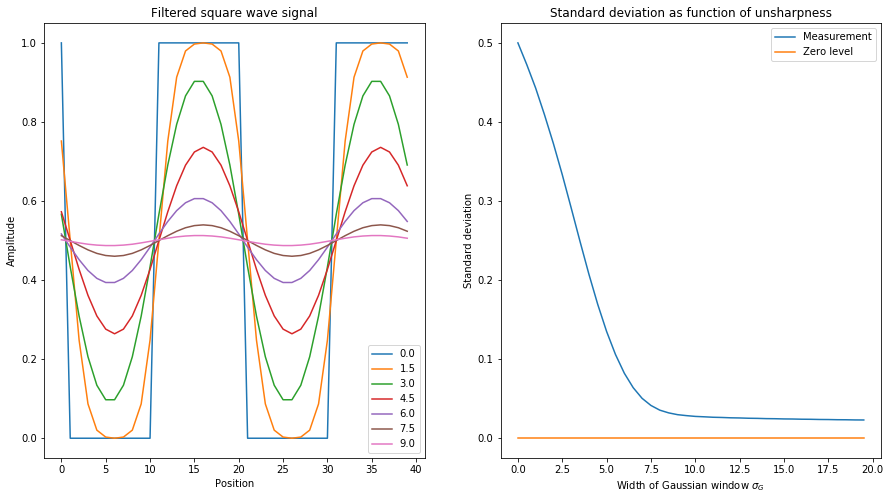

In [76]:
sigma=np.arange(0.0,20,0.5)
sd = []
mu = []
signals = []
for s in sigma :
    win = signal.gaussian(int(6*s+1),s)
    filtered = signal.convolve(y, win, mode='same') / sum(win)
    signals.append(filtered[40:80])
    mu.append(np.mean(filtered))
    sd.append(np.std(filtered))
    
plt.figure(figsize=(15,8))
plt.subplot(1,2,2)    
plt.plot(sigma,sd)
plt.plot([0,sigma[-1]],[0,0])
plt.legend(['Measurement', 'Zero level'])
plt.title('Standard deviation as function of unsharpness')
plt.xlabel('Width of Gaussian window $\sigma_G$')
plt.ylabel('Standard deviation')
plt.subplot(1,2,1)
plt.plot(np.transpose(signals[0:20:3]))
plt.title('Filtered square wave signal')
plt.xlabel('Position')
plt.ylabel('Amplitude')
plt.legend(sigma[0:20:3])
plt.savefig('stddev_smooth_signal.png')